# PD 7

## Data


In [91]:
import pandas as pd
from sklearn import mixture, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA
from math import exp, e
import numpy as np

In [92]:
df_train = pd.read_csv("train.csv")
df_val = pd.read_csv("val.csv")
df_test = pd.read_csv("test.csv")
df_test_X = df_test.iloc[:,1:]
df_test_y = df_test.iloc[:,0]


## GMM

In [93]:
gmm_train = mixture.GaussianMixture(n_components=1,covariance_type='full')
gmm_train.fit(df_train)

GaussianMixture()

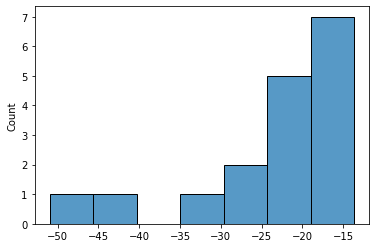

In [94]:
scores_train=gmm_train.score_samples(df_train)
ax = sns.histplot(scores)

Z informacji o zadaniu wiemy, że w w zbiorze treningowym nie ma outlierów, zatem za granicę uznamy min. prawdopodobieństwo z tego zbioru.

In [95]:
threshold=min(scores_train)

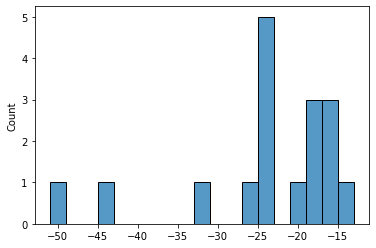

In [96]:
scores_val=gmm_train.score_samples(df_val)
ax = sns.histplot(scores, binwidth=2)

Jak widzimy, taki threshold odrzuca 3 obserwacje z df_val

## PCA do wizualizacji

In [100]:
pca=PCA(n_components=2)
pca.fit(df_train)
coords_train=pca.transform(df_train)
coords_val=pca.transform(df_val)
coords_test=pca.transform(df_test_X)
scores_test=gmm_train.score_samples(df_test_X)

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'O = test, X=val, Diamond=test, Red=outlier')

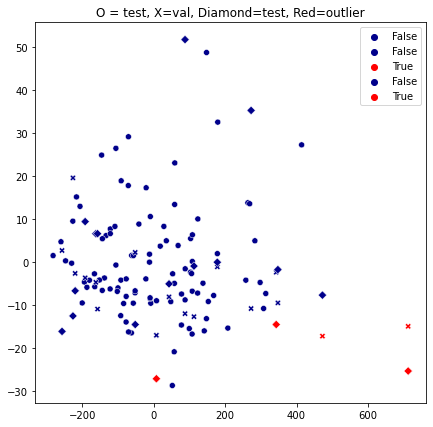

In [101]:
plt.figure(figsize=(7,7))
sns.scatterplot(coords_train[:,0], coords_train[:,1], hue=scores_train<threshold, palette=["darkblue"])
ax=sns.scatterplot(coords_val[:,0], coords_val[:,1], hue=scores_val<threshold, palette=["darkblue", "red"], marker="X")
ax=sns.scatterplot(coords_val[:,0], coords_test[:,1], hue=scores_test<threshold, palette=["darkblue", "red"], marker="D")
ax.set_title("O = test, X=val, Diamond=test, Red=outlier")

## Metrics

In [110]:
from sklearn.metrics import f1_score
f1=f1_score(df_test_y, scores_test<threshold)

In [111]:
from sklearn.metrics import precision_score
prec=precision_score(df_test_y, scores_test<threshold)

In [112]:
from sklearn.metrics import recall_score
rec=recall_score(df_test_y, scores_test<threshold)

In [121]:
data={"F1 Score": [f1], "Precision": [prec], "Recall":[rec]}
pd.DataFrame.from_dict(data)

,F1 Score,Precision,Recall
0,0.75,1.0,0.6
